 # Spectral Clustering для сегментации изображений
 ## Цель задания
 Освоить метод спектральной кластеризации и применить его для сегментации синтетических изображений с кругами.


1. Настройка среды и импорт библиотек. Первым шагом импортируем все необходимые библиотеки:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score
from time import time

2. Работа с синтетическими данными (из примера scikit-learn)

2.1 Генерация данных - создание изображения с кругами. Сгенерируем синтетическое изображение с четырьмя кругами:

In [5]:
l = 100
x, y = np.indices((l, l))

# Центры и радиусы кругов
centers = [(28, 24), (40, 50), (67, 58), (24, 70)]
radii = [16, 14, 15, 14]

# Создаем круги
circles = []
for center, radius in zip(centers, radii):
    circles.append((x - center[0])**2 + (y - center[1])**2 < radius**2)

# Комбинируем все круги в одно изображение
img = np.sum(circles, axis=0)

# Создаем маску (только foreground)
mask = img.astype(bool)

# Добавляем шум к изображению
img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)


2.2 Визуализация исходного изображения. Посмотрим на наше сгенерированное изображение:

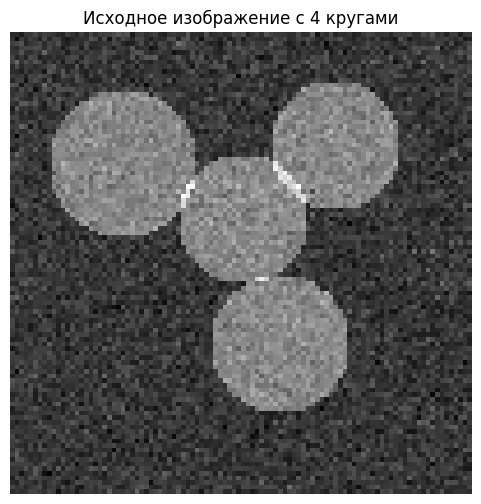

In [6]:
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap=plt.cm.gray)
plt.title("Исходное изображение с 4 кругами")
plt.axis('off')
plt.show()

2.3 Преобразование изображения в граф. Преобразуем изображение в граф для спектральной кластеризации:


In [8]:
graph = image.img_to_graph(img, mask=mask)

# Применяем экспоненциальное преобразование к весам ребер
graph.data = np.exp(-graph.data / graph.data.std())

2.4 Применение спектральной кластеризации. Теперь применим алгоритм спектральной кластеризации:


In [10]:
start_time = time()
labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')
print(f"Время кластеризации: {time() - start_time:.3f} секунд")

# Создаем изображение с метками кластеров
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

Время кластеризации: 0.270 секунд


2.5 Визуализация результатов. Сравним исходное изображение с результатами кластеризации:

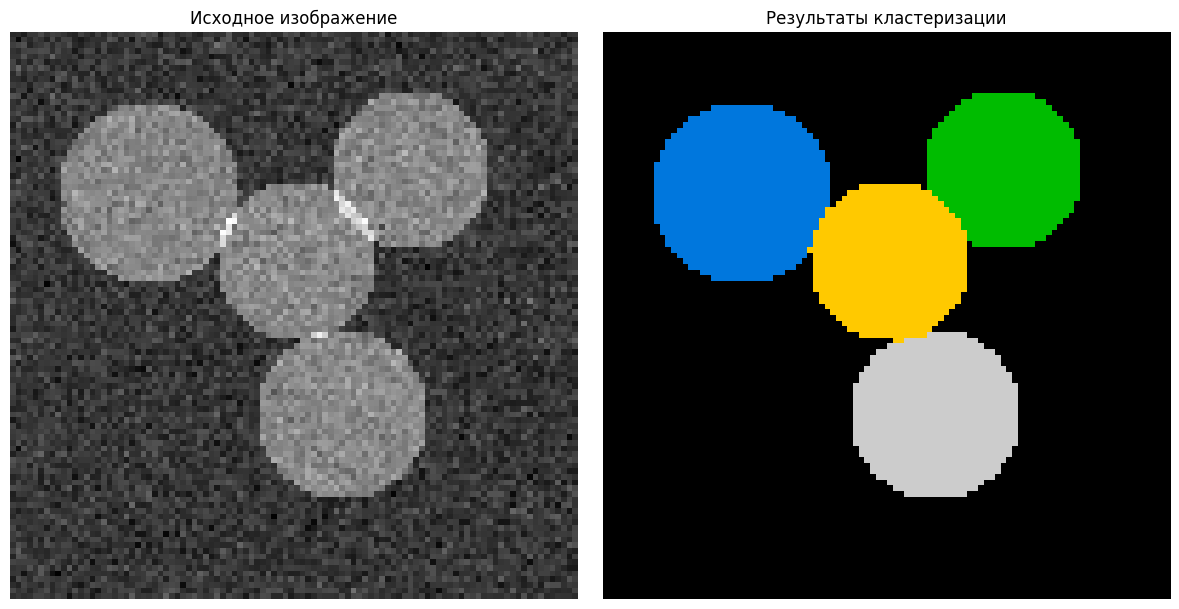

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(img, cmap=plt.cm.gray)
axs[0].set_title("Исходное изображение")
axs[0].axis('off')

axs[1].imshow(label_im, cmap=plt.cm.nipy_spectral)
axs[1].set_title("Результаты кластеризации")
axs[1].axis('off')

plt.tight_layout()
plt.show()

3. Работа с реальными данными. Теперь применим спектральную кластеризацию к реальным данным - изображению с монетами.


3.1 Загрузка и подготовка изображения. Для примера возьмем изображение монет из библиотеки skimage:


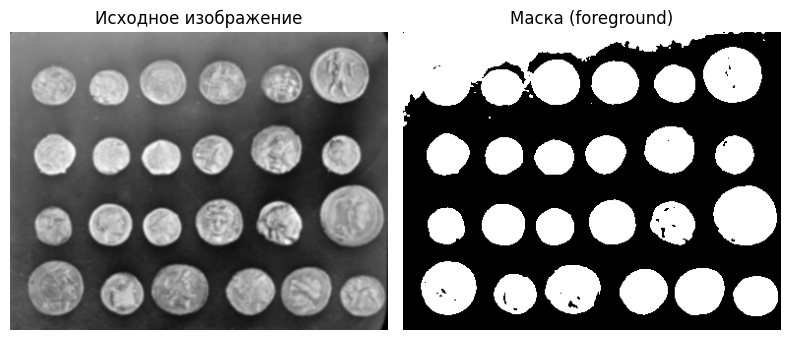

In [12]:
from skimage import data, filters, color

# Загружаем изображение монет
coins = data.coins()

# Преобразуем в grayscale и применяем фильтр Гаусса
img_coins = color.rgb2gray(coins) if len(coins.shape) == 3 else coins
img_coins = filters.gaussian(img_coins, sigma=1)

# Бинаризуем изображение для создания маски
threshold = filters.threshold_otsu(img_coins)
mask_coins = img_coins > threshold

# Визуализация
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(img_coins, cmap='gray')
plt.title("Исходное изображение")
plt.axis('off')

plt.subplot(122)
plt.imshow(mask_coins, cmap='gray')
plt.title("Маска (foreground)")
plt.axis('off')

plt.tight_layout()
plt.show()


3.2 Применение спектральной кластеризации. Применим тот же подход, что и для синтетических данных:


In [15]:
# Преобразуем изображение в граф
graph_coins = image.img_to_graph(img_coins, mask=mask_coins)
graph_coins.data = np.exp(-graph_coins.data / graph_coins.data.std())

# Определяем количество кластеров (примерное количество монет)
n_clusters = 10

# Кластеризация
start_time = time()
labels_coins = spectral_clustering(
    graph_coins, n_clusters=n_clusters, eigen_solver='arpack')
print(f"Время кластеризации: {time() - start_time:.3f} секунд")

# Создаем изображение с метками
label_im_coins = np.full(mask_coins.shape, -1.0)
label_im_coins[mask_coins] = labels_coins


C:\Users\alexe\OneDrive\Рабочий стол\4laba\venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Время кластеризации: 109.057 секунд


3.3 Визуализация результатов. Посмотрим на результаты сегментации:


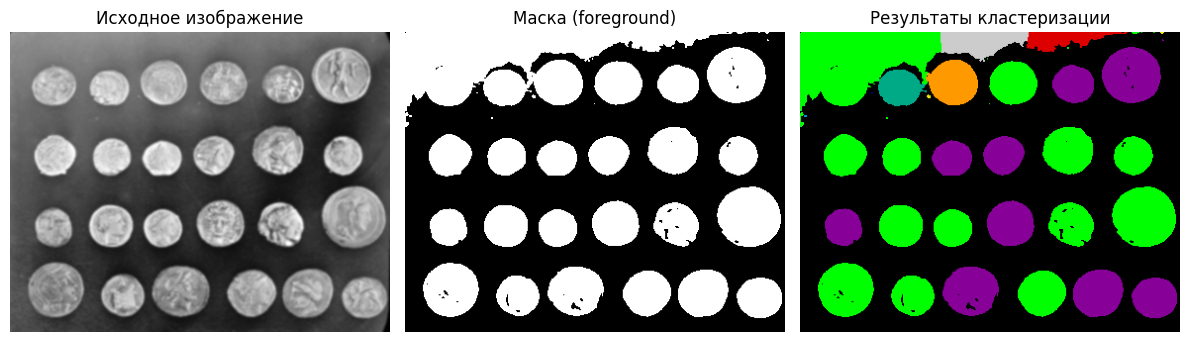

In [16]:
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(img_coins, cmap='gray')
plt.title("Исходное изображение")
plt.axis('off')

plt.subplot(132)
plt.imshow(mask_coins, cmap='gray')
plt.title("Маска (foreground)")
plt.axis('off')

plt.subplot(133)
plt.imshow(label_im_coins, cmap=plt.cm.nipy_spectral)
plt.title("Результаты кластеризации")
plt.axis('off')

plt.tight_layout()
plt.show()


## 4. Анализ результатов и выводы

 ### 4.1 Интерпретация результатов
# 1. **Синтетические данные**:
#    - Алгоритм успешно разделил 4 круга на отдельные кластеры
#    - Границы между кластерами четкие и соответствуют границам кругов
#   
# 2. **Реальные данные (монеты)**:
#    - Спектральная кластеризация выделила отдельные монеты
#    - Некоторые монеты могут быть объединены в один кластер из-за близкого расположения
#    - Результаты зависят от выбора количества кластеров

 ### 4.2 Ограничения метода
# - Чувствительность к выбору количества кластеров
# - Вычислительная сложность для больших изображений
# - Зависимость от качества маски (foreground/background separation)
 ### 4.3 Возможные улучшения
# - Использование более сложных методов определения количества кластеров
# - Предварительная обработка изображений (фильтрация, морфологические операции)
# - Комбинация с другими методами сегментации


## Заключение
# В этой работе мы:
# 1. Реализовали спектральную кластеризацию для сегментации изображений
# 2. Протестировали метод на синтетических данных (круги) и реальных данных (изображение монет)
# 3. Проанализировали результаты и обсудили ограничения метода
# 
# Спектральная кластеризация показала себя как эффективный метод для задач сегментации изображений, особенно когда важны глобальные свойства изображения, а не локальные градиенты.